# Power Spectral density

# 1.Energy spectral density

Energy spectral density describes how the energy of a signal or a time series is distributed with frequency. Here, the term energy is used in the generalized sense of signal processing;[8] that is, the energy  E of a signal is

 ![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/fbac578225f89f8fa765db406cd62041e78dab7c)

The energy spectral density is most suitable for transients—that is, pulse-like signals—having a finite total energy. In this case, Parseval's theorem [9] gives us an alternate expression for the energy of the signal:

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/4ddf55a2891ce740f70568ba71b0e4ff6d253275)

Where:

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/0505e0da490dee993a2146bb988d15c004e284fb)

 the integrand can be interpreted as a density function describing the energy per unit frequency contained in the signal at the frequency f

## 2. Power spectral density

The average power P of a signal x(t) over all time is therefore given by the following time average:

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/0ea0f376327a14e454a8b0b9c24bda0d6f3accf9)

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/65720eba3cb58f844db7c7ec2eb67b821ff13713)

where:

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/0b8957c65771a48df900e1a9503ccf29750e04bc)

### Example1：Voice signal

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/f/f1/Voice_waveform_and_spectrum.png)

### Example2: The spectral density of a fluorescent light as a function of optical wavelength shows peaks at atomic transitions, indicated by the numbered arrows

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Fluorescent_lighting_spectrum_peaks_labelled.svg/1920px-Fluorescent_lighting_spectrum_peaks_labelled.svg.png)

### Code Example 1: PSD of singnal wave

In [4]:
from scipy.io import wavfile

fs, data = wavfile.read('test3.wav')
print(data.shape)
print(fs)

(151542, 2)
48000


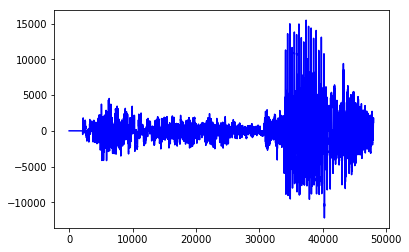

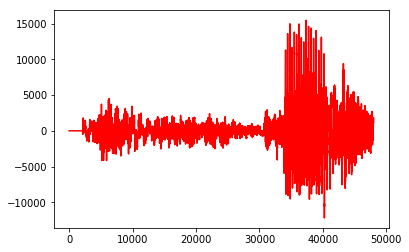

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.plot(data[:1*fs,0],'b')
plt.show()
plt.plot(data[:1*fs,1],'r')
plt.show()

In [6]:
import numpy as np
np.all(data[:,0]==data[:,1])

True

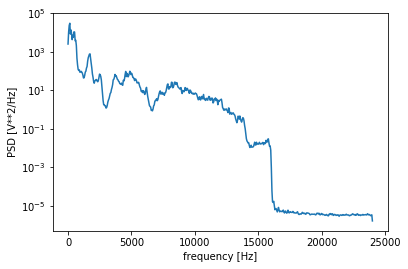

In [9]:
from scipy import signal
>>> import matplotlib.pyplot as plt
fs=48000
>>> f, Pxx_den = signal.welch(data[:,0], fs, nperseg=1024)
>>> plt.semilogy(f, Pxx_den)

>>> plt.xlabel('frequency [Hz]')
>>> plt.ylabel('PSD [V**2/Hz]')
>>> plt.show()

### Code Example2: Find the noise power

In [10]:
>>> from scipy import signal
>>> import matplotlib.pyplot as plt
>>> np.random.seed(1234)

Generate a test signal, a 2 Vrms sine wave at 1234 Hz, corrupted by 0.001 V**2/Hz of white noise sampled at 10 kHz.

In [11]:
>>> fs = 10e3
>>> N = 1e5
>>> amp = 2*np.sqrt(2)
>>> freq = 1234.0
>>> noise_power = 0.001 * fs / 2
>>> time = np.arange(N) / fs
>>> x = amp*np.sin(2*np.pi*freq*time)
>>> x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

Compute and plot the power spectral density.

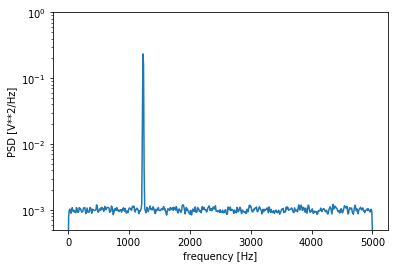

In [12]:
>>> f, Pxx_den = signal.welch(x, fs, nperseg=1024)
>>> plt.semilogy(f, Pxx_den)
>>> plt.ylim([0.5e-3, 1])
>>> plt.xlabel('frequency [Hz]')
>>> plt.ylabel('PSD [V**2/Hz]')
>>> plt.show()

If we average the last half of the spectral density, to exclude the peak, we can recover the noise power on the signal.

In [13]:
>>> np.mean(Pxx_den[256:])

0.0009961552715877023

# Pink Noise

Pink noise or ​1⁄f noise is a signal or process with a frequency spectrum such that the power spectral density (energy or power per frequency interval) is inversely proportional to the frequency of the signal.

Pink noise is the most common signal in biological systems.

Wiki:https://en.wikipedia.org/wiki/Pink_noise

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/2c3327da06d2abda94a7a8db08e0ff7afa4421ea)

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Pink_noise_spectrum.svg/220px-Pink_noise_spectrum.svg.png)

Spectrum of a pink noise approximation on a log-log plot. Power density falls off at 10 dB/decade of frequency.

## Code Example: Create a pink noise signal

As in the previous, we know how to create white noise signal

(100000,)
[ 33.33550012-1.48429535e-14j -84.214699  +2.62693381e-14j
 101.30768128-5.36601874e-15j ...   2.07081358-2.64585087e-14j
 -86.30455938+1.34791239e-13j  27.16084608-7.75172369e-14j]
[ 33.33550012 -84.214699   101.30768128 ...   2.07081358 -86.30455938
  27.16084608]


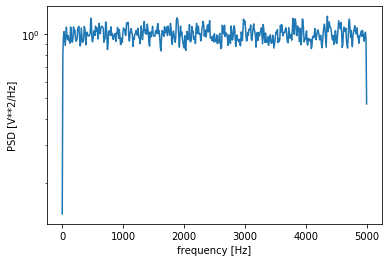

In [52]:
>>> from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

>>> np.random.seed(1234)
>>> fs = 10e3
>>> N = 1e5
>>> amp = 2*np.sqrt(2)
>>> freq = 1234.0
>>> noise_power = 1 * fs / 2
>>> time = np.arange(N) / fs
print(time.shape)
>>> y = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
yf = scipy.fftpack.fft(y)
X=scipy.fftpack.ifft(yf)
import numpy as np
print(X)
print(y)
f, Pxx_den = signal.welch(y, fs, nperseg=1024)
>>> plt.semilogy(f, Pxx_den)
# plt.xlim(1,4999)
>>> plt.xlabel('frequency [Hz]')
>>> plt.ylabel('PSD [V**2/Hz]')
>>> plt.show()


/home/ww6p9/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1818: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


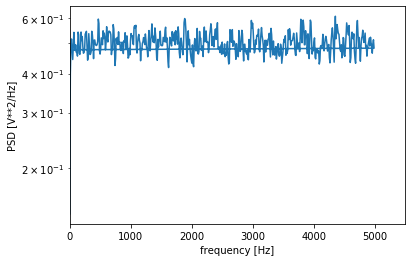

In [2]:
f, Pxx_den = signal.welch(X, fs, nperseg=1024)
>>> plt.semilogy(f, Pxx_den)
plt.xlim(0,)
>>> plt.xlabel('frequency [Hz]')
>>> plt.ylabel('PSD [V**2/Hz]')
>>> plt.show()

% generate white noise FFT

In [4]:
yf = scipy.fftpack.fft(y)
yfold=yf

In [5]:
print(yf.shape)
print(fs)
M=yf.shape[0]

(100000,)
10000.0


In [6]:
NumUniquePts = M / 2;
print(NumUniquePts)
b = np.arange(1,NumUniquePts,1)
print(b)

50000.0
[1.0000e+00 2.0000e+00 3.0000e+00 ... 4.9997e+04 4.9998e+04 4.9999e+04]


In [6]:
alpha=2
np.power(b, alpha/2)
print(b)

[1.0000e+00 2.0000e+00 3.0000e+00 ... 4.9997e+04 4.9998e+04 4.9999e+04]


In [8]:
#np.true_divide(yf[1:int(NumUniquePts)],b)
yf[1:int(NumUniquePts)]=yf[1:int(NumUniquePts)]/b

In [9]:
(yf[int(NumUniquePts):M]).shape

(50000,)

In [10]:
k=np.conjugate(yf[0:int(NumUniquePts)])

In [11]:
yf[int(NumUniquePts):M]=k[::-1]

In [20]:
Ypink=np.fft.ifft(yf)
# Ypink=np.fft.ifft(yfold)

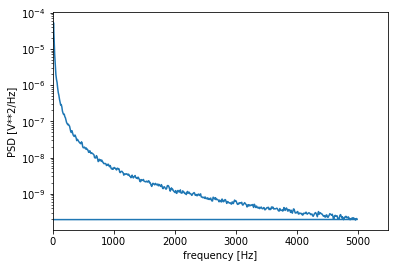

In [31]:
f, Pxx_den = signal.welch(Ypink, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlim(0,) 
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.show()

In [18]:
Pxx_den

array([1.62334655e-05, 5.29866005e-05, 1.89299766e-05, ...,
       6.85085475e-06, 1.92673711e-05, 5.43976130e-05])

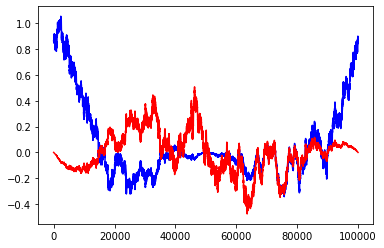

In [37]:
plt.plot(Ypink.real,"b")
plt.plot(Ypink.imag,"r")

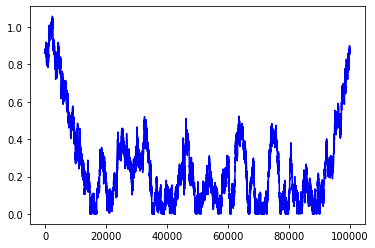

In [39]:
plt.plot(abs(Ypink),"b")

In [42]:
import pandas as pd

In [43]:
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

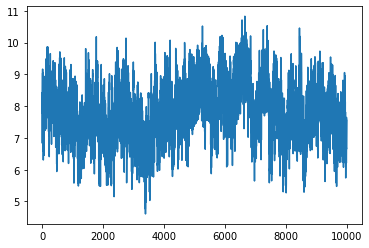

In [45]:
plt.plot(voss(10000))

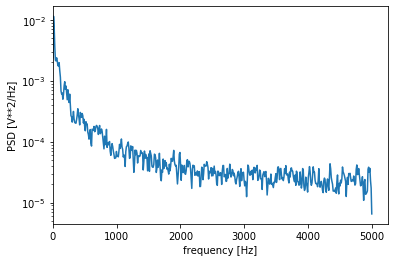

In [51]:
f, Pxx_den = signal.welch(voss(10000), fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlim(0,) 
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.show()